In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/205e1808-6-dataset/data.csv')
print(dataset.shape)


(45200, 10)


In [ ]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])


dataset['hour'] = dataset['datetime'].dt.hour
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek
print(dataset.shape)


X = dataset.iloc[:, [2, 3, 4, 5, 6,7,8, 10, 11]].values
y = dataset.iloc[:, [9]].values
print(X.shape)

(45200, 12)
(45200, 9)


In [ ]:

X_columns = dataset.iloc[:, [2, 3, 4, 5, 6, 7, 8, 10, 11]].columns
print(X_columns)
yy = dataset.iloc[:, [9]].columns
print(yy)

Index(['siteid', 'offerid', 'category', 'merchant', 'countrycode', 'browserid',
       'devid', 'hour', 'day_of_week'],
      dtype='object')
Index(['click'], dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X[:, [5, 6]] = imputer.fit_transform(X[:, [5, 6]])
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
X[:, [0]] = imputer.fit_transform(X[:, [0]])



In [ ]:
categorical_columns = [4, 5, 6, 7, 8]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    X[:, column] = label_encoder.fit_transform(X[:, column])

print(X)



[[6310005.0 99217 41706 ... 1 19 2]
 [-1 287164 89522 ... 2 15 5]
 [2463708.0 948989 12052 ... 1 10 4]
 ...
 [2656998.0 324233 48430 ... 1 21 6]
 [-1 908599 904 ... 2 7 0]
 [9223301.0 487571 41640 ... 1 13 1]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(dataset.isnull().sum())

ID                0
datetime          0
siteid         4518
offerid           0
category          0
merchant          0
countrycode       0
browserid      2345
devid          6864
click             0
hour              0
day_of_week       0
dtype: int64


apply the model here
**bold text**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred  = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.863716814159292


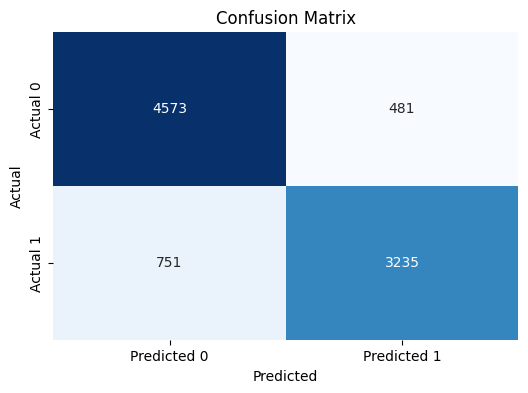

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(6, 4))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4573  481]
 [ 751 3235]]


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.840041547649961


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Print the number of "1"s and "0"s in training data
print("Training Data:")
print("Number of '1's:", sum(y_train == 1))
print("Number of '0's:", sum(y_train == 0))

# Print the number of "1"s and "0"s in testing data
print("\nTesting Data:")
print("Number of '1's:", sum(y_test == 1))
print("Number of '0's:", sum(y_test == 0))


# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate accuracy for each class
accuracy_0 = conf_matrix[0, 0] / sum(conf_matrix[0, :])
accuracy_1 = conf_matrix[1, 1] / sum(conf_matrix[1, :])

# Print accuracy for each class
print("\nAccuracy for '0':", accuracy_0)
print("Accuracy for '1':", accuracy_1)

Training Data:
Number of '1's: [16014]
Number of '0's: [20146]

Testing Data:
Number of '1's: [3986]
Number of '0's: [5054]

Confusion Matrix:
[[4573  481]
 [ 751 3235]]

Accuracy for '0': 0.9048278591214879
Accuracy for '1': 0.8115905669844455
